# Definition of the sensor localization problem

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
small_size = 16
medium_size = 20
bigger_size = 24

plt.rc("font", size=small_size)  # controls default text sizes
plt.rc("axes", titlesize=small_size)  # fontsize of the axes title
plt.rc("axes", labelsize=medium_size)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=small_size)  # fontsize of the tick labels
plt.rc("ytick", labelsize=small_size)  # fontsize of the tick labels
plt.rc("legend", fontsize=small_size)  # legend fontsize
plt.rc("figure", titlesize=bigger_size)  # fontsize of the figure title

In [3]:
df_sensors = pd.read_csv("./sensor_loc/data/sensors_localizations_rescaled.csv")
df_sensors

,sensor_id,known,x,y
0,0,True,0.500000,0.300000
1,1,True,0.300000,0.700000
2,2,True,0.700000,0.700000
3,3,False,0.574774,0.906946
4,4,False,0.365064,0.099119
5,5,False,0.457822,0.234989
6,6,False,0.224760,0.481582
7,7,False,0.854572,0.039176
8,8,False,0.551816,0.735527
9,9,False,0.134968,0.819797


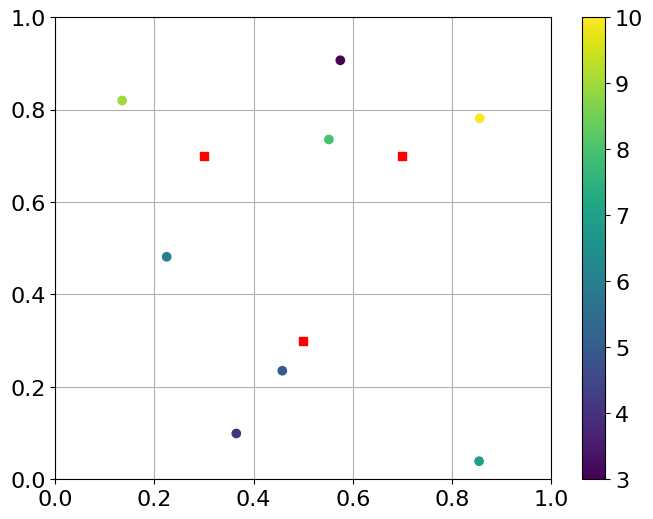

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(
    df_sensors.loc[df_sensors["known"], "x"],
    df_sensors.loc[df_sensors["known"], "y"],
    c="r",
    marker="s",
)
plt.scatter(
    df_sensors.loc[~df_sensors["known"], "x"],
    df_sensors.loc[~df_sensors["known"], "y"],
    c=df_sensors.loc[~df_sensors["known"]].index,  # "k",
    marker="o",
)
plt.grid()
# plt.axis("equal")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.colorbar()
plt.show()

# definition of observations

In [5]:
Yb = np.array(
    [
        [0.61025878, 0.36309862, 0.0],
        [0.21709465, 0.0, 0.0],
        [0.09053334, 0.48509278, 0.0],
        [0.0, 0.26174627, 0.0],
        [0.0, 0.0, 0.0],
        [0.0, 0.24391333, 0.18314159],
        [0.0, 0.19819737, 0.0],
        [0.0, 0.0, 0.18866747],
    ]
)

Ys = np.array(
    [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.15842067, 0.37163305, 0.49768649, 0.0, 0.0, 0.82343461],
        [0.0, 0.15842067, 0.0, 0.0, 0.44686253, 0.0, 0.0, 0.0],
        [0.0, 0.37163305, 0.0, 0.0, 0.0, 0.41708222, 0.32975727, 0.0],
        [0.0, 0.49768649, 0.44686253, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.41708222, 0.0, 0.0, 0.0, 0.30952227],
        [0.0, 0.0, 0.0, 0.32975727, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.82343461, 0.0, 0.0, 0.0, 0.30952227, 0.0, 0.0],
    ]
)

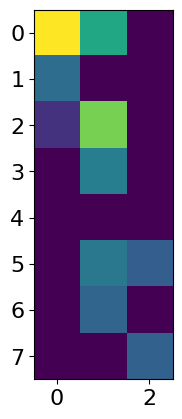

In [6]:
plt.imshow(Yb)
plt.show()

In [7]:
list_dict_obs = []

# known - unknown observations
for i in range(3):
    for j in range(3):
        dict_obs = {
            "sensor_id_1": i,
            "sensor_id_2": j,
            "observed": False if i != j else True,
            "y": -1 if i != j else 0,
        }
        list_dict_obs.append(dict_obs)

for i in range(3):
    for j in range(8):
        dict_obs = {
            "sensor_id_1": i,
            "sensor_id_2": j + 3,
            "observed": Yb[j, i] > 0,
            "y": Yb[j, i] if Yb[j, i] > 0 else -1,
        }
        list_dict_obs.append(dict_obs)
        dict_obs = {
            "sensor_id_1": j + 3,
            "sensor_id_2": i,
            "observed": Yb[j, i] > 0,
            "y": Yb[j, i] if Yb[j, i] > 0 else -1,
        }
        list_dict_obs.append(dict_obs)

for i in range(8):
    for j in range(8):
        dict_obs = {
            "sensor_id_1": i + 3,
            "sensor_id_2": j + 3,
            "observed": Ys[j, i] > 0 if i != j else True,
            "y": Ys[j, i] if Ys[j, i] > 0 or i == j else -1,
        }
        list_dict_obs.append(dict_obs)

df_obs = pd.DataFrame.from_records(list_dict_obs)
df_obs = df_obs.sort_values(["sensor_id_1", "sensor_id_2"])
df_obs.head(12)
df_obs.to_csv("./sensor_loc/data/observation.csv", index=False)

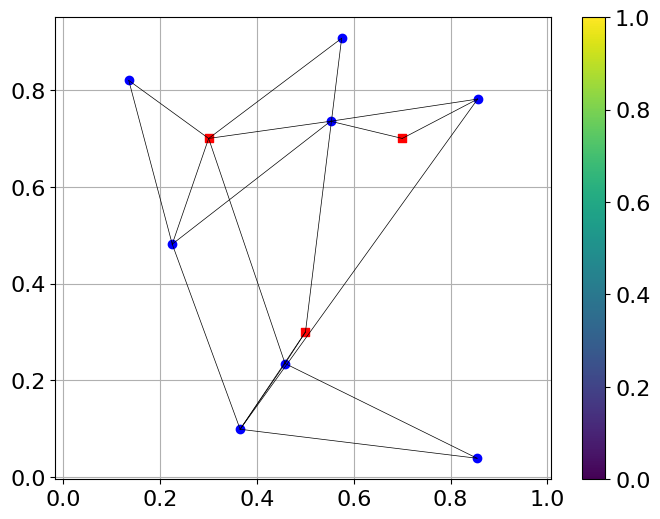

In [11]:
plt.figure(figsize=(8, 6))

# plot edges
for dict_ in list_dict_obs:
    id_0, id_1 = dict_["sensor_id_1"], dict_["sensor_id_2"]
    if id_0 < id_1 and dict_["observed"]:
        plt.plot(
            [df_sensors.at[id_0, "x"], df_sensors.at[id_1, "x"]],
            [df_sensors.at[id_0, "y"], df_sensors.at[id_1, "y"]],
            "k-",
            linewidth=0.5,
        )

# plot known points
plt.scatter(
    df_sensors.loc[df_sensors["known"], "x"],
    df_sensors.loc[df_sensors["known"], "y"],
    c="r",
    marker="s",
)

# plot unknown points
plt.scatter(
    df_sensors.loc[~df_sensors["known"], "x"],
    df_sensors.loc[~df_sensors["known"], "y"],
    c="b",
    marker="o",
)

plt.grid()
plt.axis("equal")
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.colorbar()
plt.show()